# Retail Orders (Python + SQL) Project

## Load and read the dataset

In [33]:
import pandas as pd
df = pd.read_csv('retail_orders.csv')
df.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [34]:
# Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9993 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  cost price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB


In [35]:
df.head(25)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
5,6,2022-03-13,Not Available,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,50,50,7,3
6,7,2022-12-28,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,OFF-AR-10002833,10,10,4,3
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,860,910,6,5
8,9,2023-03-23,Not Available,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,20,20,3,2
9,10,2023-05-16,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,OFF-AP-10002892,90,110,5,3


In [36]:
df['Ship Mode'].unique()
# Ship Mode Column has: "Not Available", "Unknown", "nan" values, So we consider these value as Null Values.

df = pd.read_csv('retail_orders.csv', na_values=['Not Available', 'unknown']) 
            # Shift + Tab          # na_values are treated as null

df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', nan, 'First Class', 'Same Day'],
      dtype=object)

In [37]:
# df.head(25)

In [38]:
# Rename/Fix the column names: make them lowercase and replace space with underscore:

# Method 1:
#df.rename(columns={'Order Id': 'order_id', 'Order Date': 'order_date', 'Ship Mode': 'ship_mode'})

# Method 2:
df.columns = df.columns.str.lower().str.replace(' ','_')  #Make String and convert it into lowercase
                                    # Replace Space with "_"

In [39]:
df.columns

Index(['order_id', 'order_date', 'ship_mode', 'segment', 'country', 'city',
       'state', 'postal_code', 'region', 'category', 'sub_category',
       'product_id', 'cost_price', 'list_price', 'quantity',
       'discount_percent'],
      dtype='object')

In [40]:
# Create New Column: Discount, Sale Price, and Profit
df['discount'] = df['list_price']*df['discount_percent']*.01

df['sale_price'] = df['list_price'] - df['discount']

df['profit'] = df['sale_price']-df['cost_price']



# Now we don't need; "cost_price, list_price, discount_percent" columns, So drop these columns
# Because new columns; "discount, sale_price, profit" are sufficient for analysis.

df.drop(columns=['cost_price', 'list_price', 'discount_percent'], inplace=True)

In [41]:
# Convert Order date from object data type to datetime
#df.dtypes

df['order_date'] = pd.to_datetime(df['order_date'], format= '%Y-%m-%d')

# Convert postal_code to string
df['postal_code'] = df['postal_code'].astype(str)

In [42]:
df.dtypes

order_id                 int64
order_date      datetime64[ns]
ship_mode               object
segment                 object
country                 object
city                    object
state                   object
postal_code             object
region                  object
category                object
sub_category            object
product_id              object
quantity                 int64
discount               float64
sale_price             float64
profit                 float64
dtype: object

### Visualization

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1200x600 with 0 Axes>

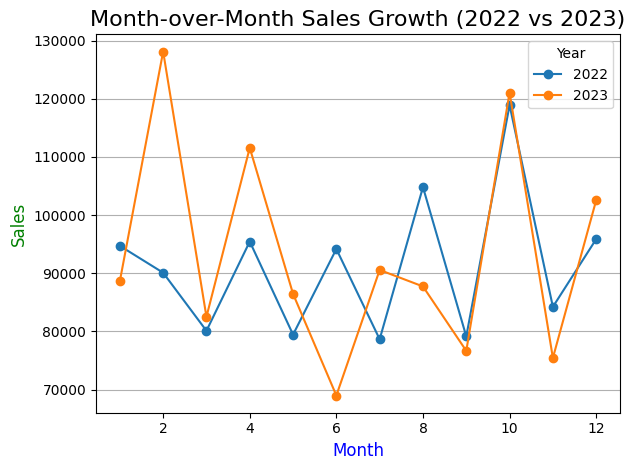

In [44]:
# Month-over-month sales growth for 2022 and 2023

df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
monthly_sales = df.groupby(['year', 'month'])['sale_price'].sum().unstack(level=0).fillna(0)

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Month-over-Month Sales Growth (2022 vs 2023)', fontsize=16)
plt.xlabel('Month', fontsize=12, c='b')
plt.ylabel('Sales', c='g', fontsize=12)
plt.grid(axis='y')
plt.legend(title='Year', labels=['2022', '2023'])
plt.tight_layout()
plt.show()

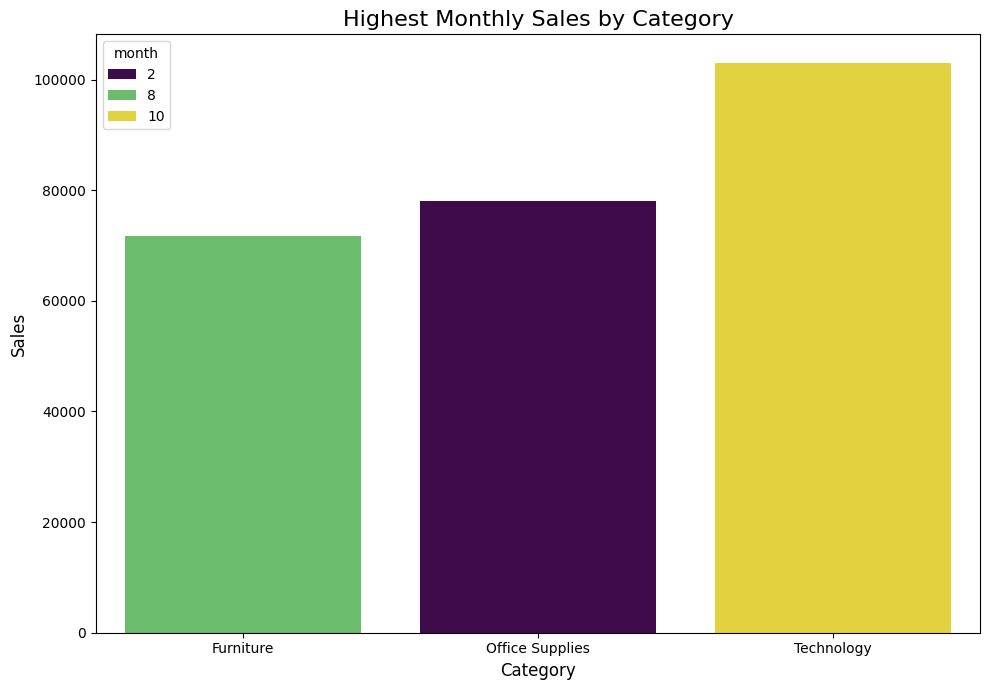

In [45]:
# Monthly highest sales per category
monthly_sales_category = (
    df.groupby(['category', 'month'])['sale_price']
    .sum()
    .reset_index()
    .sort_values(['category', 'sale_price'], ascending=[True, False])
    .groupby('category')
    .head(1)
)
plt.figure(figsize=(10, 7))
sns.barplot(data=monthly_sales_category, x='category', y='sale_price', hue='month', palette='viridis')
plt.title('Highest Monthly Sales by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.tight_layout()
plt.show()

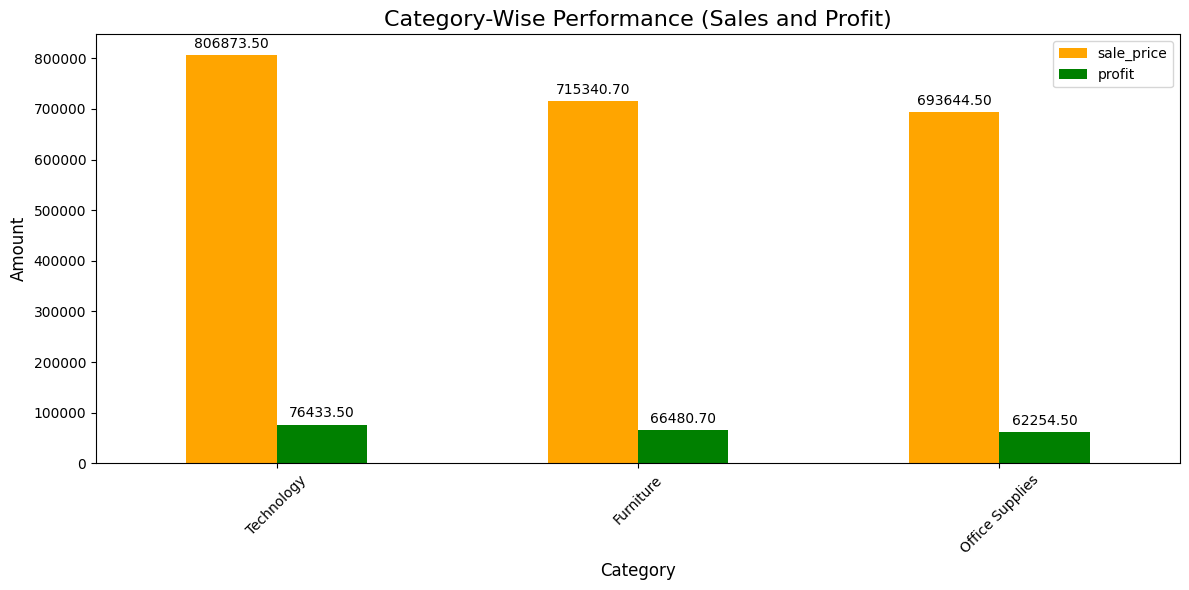

In [46]:
# Category-wise Performance: 

# Group by category and calculate sales and profit
category_performance = df.groupby('category')[['sale_price', 'profit']].sum().sort_values('sale_price', ascending=False)

ax = category_performance.plot(kind='bar', figsize=(12, 6), color=['orange', 'green'])
plt.title('Category-Wise Performance (Sales and Profit)', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

plt.show()

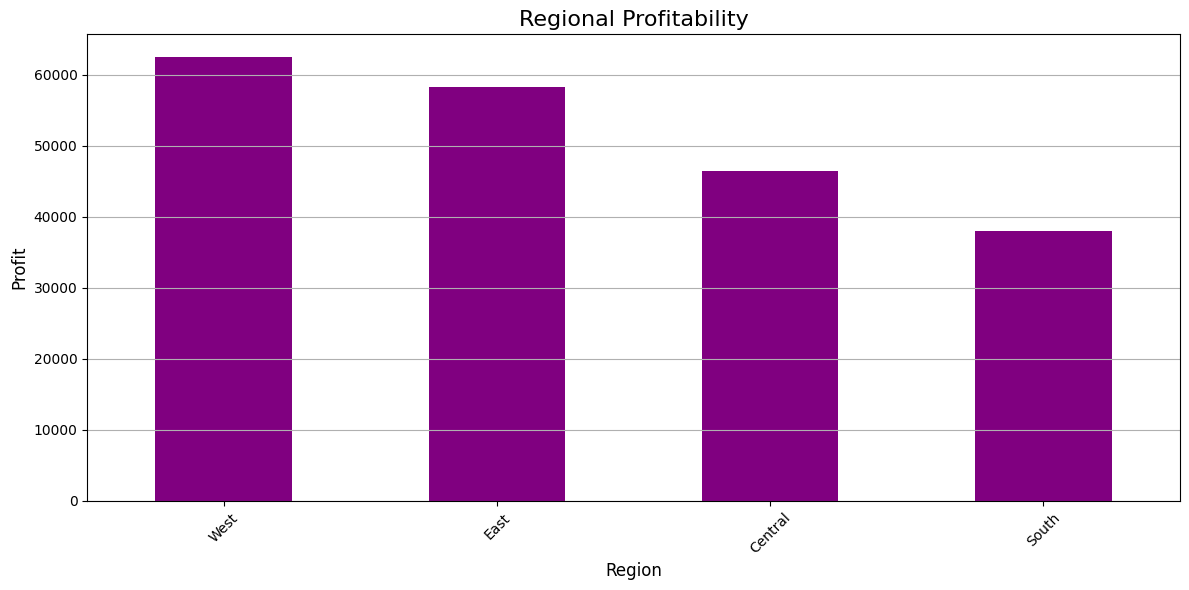

In [17]:
#Regional Profitability
regional_profit = df.groupby('region')['profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
regional_profit.plot(kind='bar', color='purple')
plt.title('Regional Profitability', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

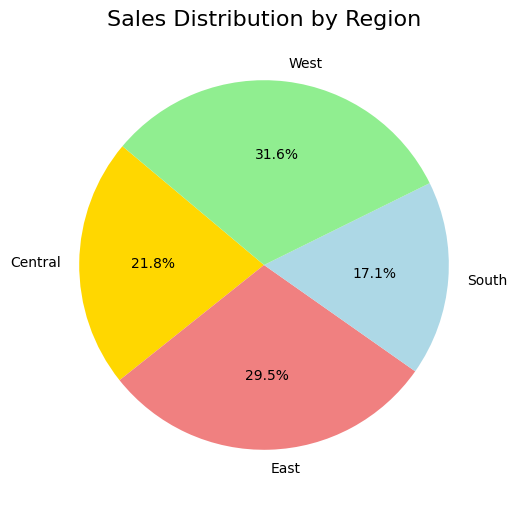

In [18]:
# Sales Distribution by Region:
region_sales = df.groupby('region')['sale_price'].sum()
region_sales.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'lightblue', 'lightgreen'])
plt.title('Sales Distribution by Region', fontsize=16)
plt.ylabel('')  # Remove y-axis label for better clarity
plt.show()

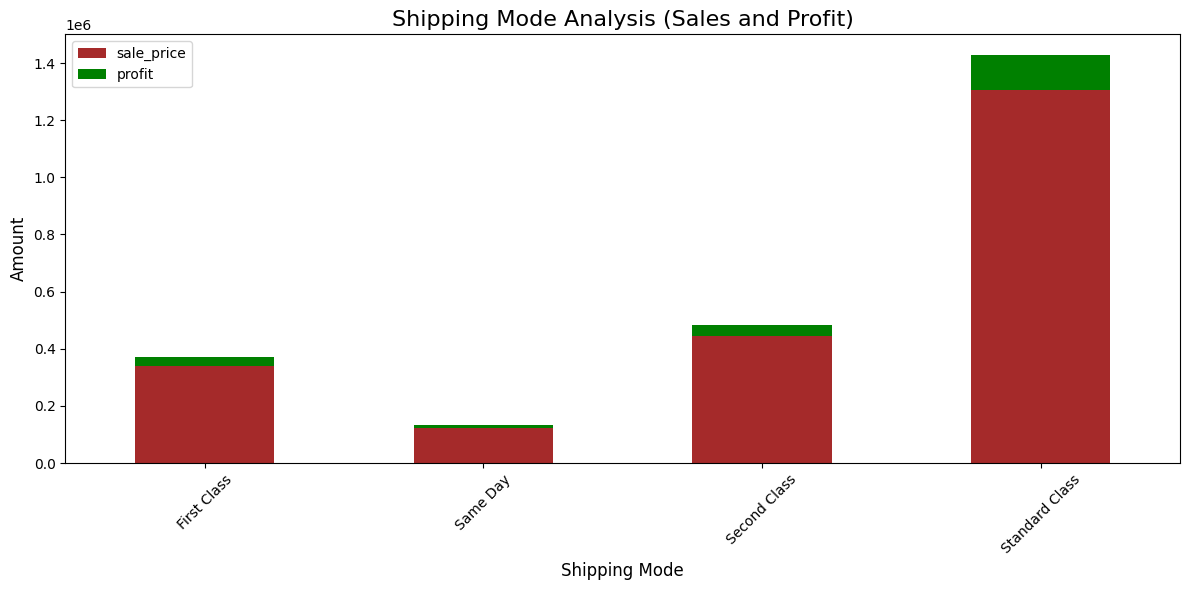

In [19]:
#Shipping Mode Analysis :

shipping_analysis = df.groupby('ship_mode')[['sale_price', 'profit']].sum()
shipping_analysis.plot(kind='bar', stacked=True, figsize=(12, 6), color=['brown', 'green'])
plt.title('Shipping Mode Analysis (Sales and Profit)', fontsize=16)
plt.xlabel('Shipping Mode', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


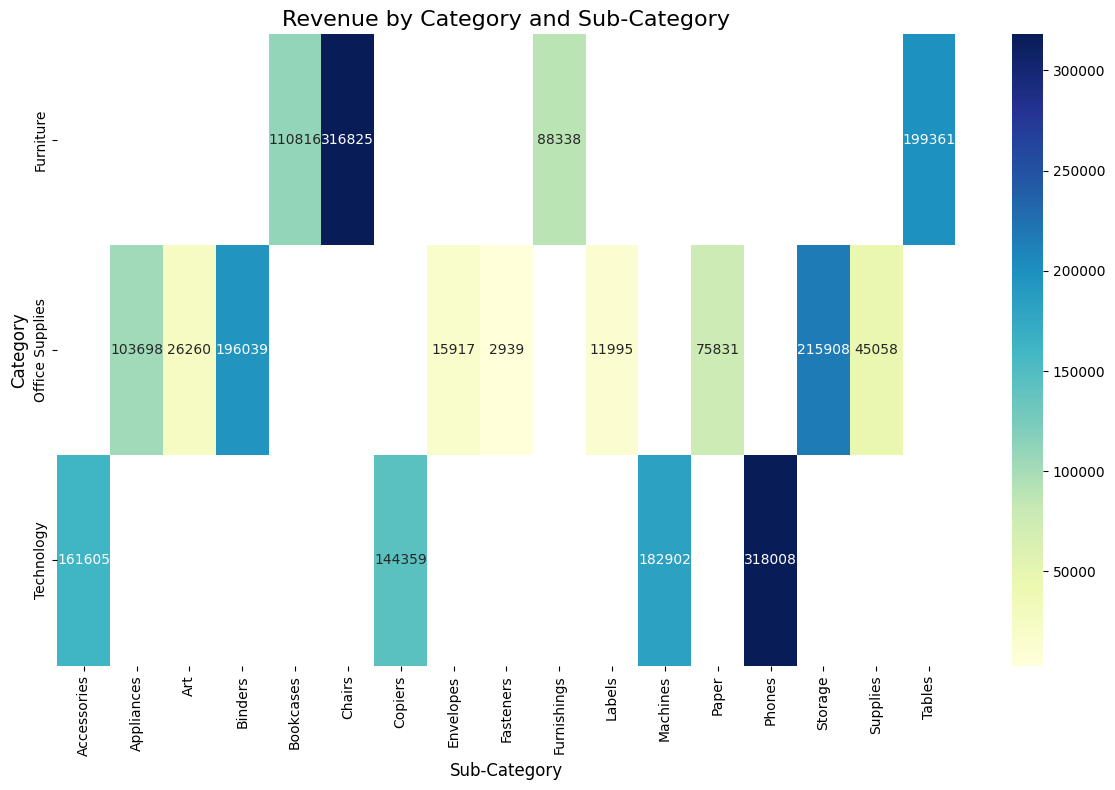

In [20]:
# Revenue by Category and Sub-Category:
category_subcategory = df.pivot_table(values='sale_price', index='category', columns='sub_category', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(category_subcategory, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Revenue by Category and Sub-Category', fontsize=16)
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.show()

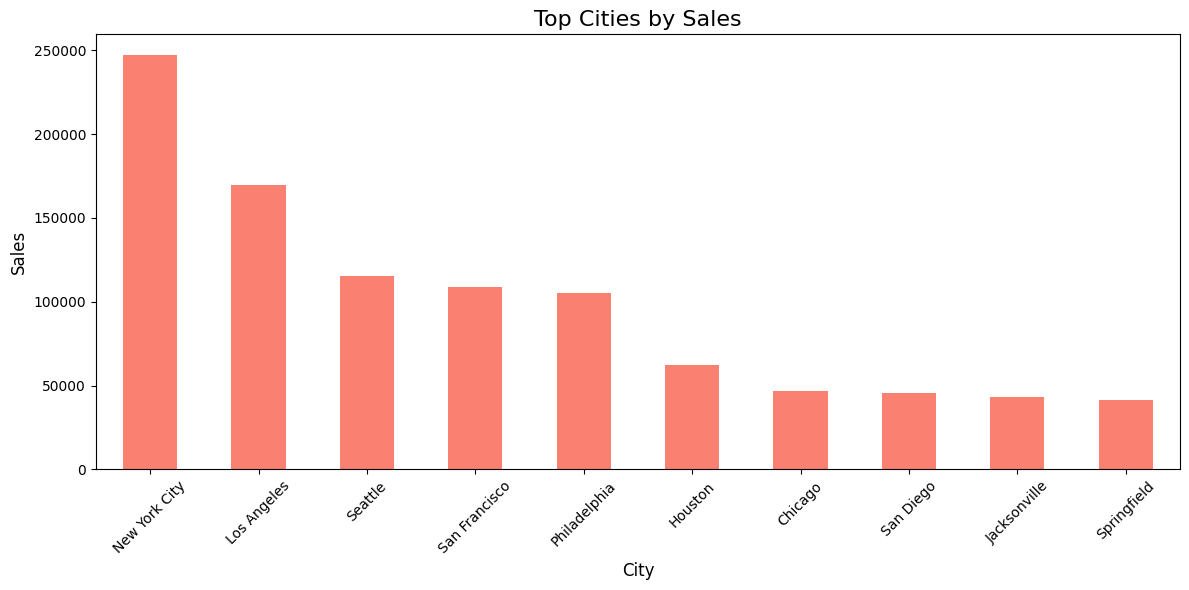

In [26]:
#Top Cities by Sales:
top_cities = df.groupby('city')['sale_price'].sum().nlargest(10)
top_cities.plot(kind='bar', figsize=(12, 6), color='salmon')
plt.title('Top Cities by Sales', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Load the Data into SQL server using replace option:

In [27]:
# Already done
#!pip install --upgrade mysql-connector-python

In [29]:
import mysql.connector
from sqlalchemy import create_engine

# Set Up MySQL connection parameters:
username = 'root' # Replace with Your Username
password = 'MySQL' #Replace with Your Password
host = 'localhost'
port = '3306'  # Default MySQL port
database = 'Retail_Orders'

connection_string = f'mysql+mysqlconnector://{username}:{password}@{host}/{database}'
engine = create_engine(connection_string, echo=True)

# Load data into MySQL with replace option        'replace'
df.to_sql('retail_orders', con=engine, if_exists='append',index=False)
# First I create table name on MySQL and define it's data type then I append(add) the dataset in "retail_orders" table instead of "replace"

In [30]:
# Query data to check if it was successfully loaded
with engine.connect() as conn:
    result = pd.read_sql("SELECT * FROM retail_orders LIMIT 5", conn)
print(result)

2024-11-19 13:01:41,952 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2024-11-19 13:01:41,953 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-11-19 13:01:41,957 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2024-11-19 13:01:41,958 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-11-19 13:01:41,960 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2024-11-19 13:01:41,962 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-11-19 13:01:41,968 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-11-19 13:01:41,969 INFO sqlalchemy.engine.Engine DESCRIBE `retail_orders`.`SELECT * FROM retail_orders LIMIT 5`
2024-11-19 13:01:41,970 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-11-19 13:01:41,991 INFO sqlalchemy.engine.Engine SELECT * FROM retail_orders LIMIT 5
2024-11-19 13:01:41,992 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-11-19 13:01:42,003 INFO sqlalchemy.engine.Engine ROLLBACK
   order_id  order_date       ship_mode    segment        country  \
0         1  2023-03-01  

In [31]:
from sqlalchemy import text

with engine.connect() as conn:
    row_count = conn.execute(text("SELECT COUNT(*) FROM retail_orders")).scalar()
print(f"Number of rows inserted: {row_count}")

2024-11-19 13:01:42,205 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-11-19 13:01:42,206 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM retail_orders
2024-11-19 13:01:42,207 INFO sqlalchemy.engine.Engine [generated in 0.00374s] {}
2024-11-19 13:01:42,227 INFO sqlalchemy.engine.Engine ROLLBACK
Number of rows inserted: 9994


In [32]:
df.columns

Index(['order_id', 'order_date', 'ship_mode', 'segment', 'country', 'city',
       'state', 'postal_code', 'region', 'category', 'sub_category',
       'product_id', 'quantity', 'discount', 'sale_price', 'profit', 'year',
       'month'],
      dtype='object')

In [49]:
# Creating "requirement.txt" file:
#!pip freeze > requirement.txt